<a href="https://colab.research.google.com/github/fthcknmz/TensorFlow-for-Deep-Learning/blob/main/ConvertCelsiusToFahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f = c*1.8+32
f: fahrenheit
c: celsius

In [ ]:
import tensorflow as tf

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

print("imports are done!")

imports are done!


# **Set up training data**

*   inputs are called feature (celsius degree)
*   outputs are called labels (fahrenheit degree)

In [ ]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees celcius = {} degrees fahrenheit".format(c, fahrenheit_a[i]))



-40.0 degrees celcius = -40.0 degrees fahrenheit
-10.0 degrees celcius = 14.0 degrees fahrenheit
0.0 degrees celcius = 32.0 degrees fahrenheit
8.0 degrees celcius = 46.0 degrees fahrenheit
15.0 degrees celcius = 59.0 degrees fahrenheit
22.0 degrees celcius = 72.0 degrees fahrenheit
38.0 degrees celcius = 100.0 degrees fahrenheit


# **Create the model**
in this case, we use a single layer network




*Build a layer*


*   input_shape=[1] : specifies that the input to this layer is a single value.
(a one-dimensional array with one member)
*   units=1 : specifies the number of neurons in the layer.
(how many internal variables the layer has to try to learn how to solve the problem)

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

*Assemble layers into the model*

The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.


In [ ]:
model = tf.keras.Sequential([l0])

# **Compile the model**
Before training, the model has to be compiled


*   Loss function : A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

*   Optimizer function — A way of adjusting internal values in order to reduce the loss.

0.1 is learning rate, how agressively tr to find the best model (the range is usually within 0.001 (default), and 0.1)


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# **Train the model**
Train the model by calling the fit method.
The cycle of calculate, compare, adjust is controlled by the fit method.


*   epochs : how many times this cycle should be run.
*   verbose : how much output the method produces.




In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("the model has been trained!")

the model has been trained


***Display training statistics***

the fit method returns a history object, use this object to plot how the loss of our model goes down after each training epoch.




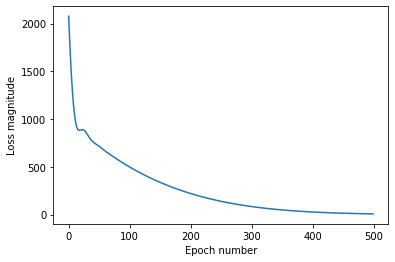

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch number')
plt.ylabel('Loss magnitude')
plt.plot(history.history['loss'])

# **Use the model to predict values**
the model has been trained to learn the relationship between celsius_q and fahrenheit_a. 
we are able to use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

example: 100 celsius degree = ? fahrenhait degree

In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 75ms/step
[[211.33176]]


exact value is:

In [ ]:
f = 100*1.8+32
print(f)

212.0


# **The layer weights**

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8214796]], dtype=float32), array([29.183815], dtype=float32)]


the first ~1.8 and the second ~32 values (1.8 and 32) are the actual variables in the real conversion formula.

# **MORE ON THAT**

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("model is trained!")

print(model.predict([100.0]))

print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))


model is trained!
1/1 [==============================] - 0s 61ms/step
[[211.74747]]
1/1 [==============================] - 0s 23ms/step
Model predicts that 100 degrees Celsius is: [[211.74747]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.18213168,  0.5559235 , -0.5085372 , -0.32432494]],
      dtype=float32), array([-2.9596138,  3.5546386, -1.4534235, -3.6672957], dtype=float32)]
These are the l1 variables: [array([[-0.7721858 ,  0.9079258 ,  0.70640695, -0.00991228],
       [ 1.3770593 , -0.13185988, -1.2445881 , -0.8631066 ],
       [ 0.32476613, -0.2800731 ,  0.04917632, -1.4922624 ],
       [-1.2755256 , -0.18158822,  0.9947697 , -0.30299532]],
      dtype=float32), array([ 3.5640678 ,  0.02404401, -3.1330903 ,  1.9666139 ], dtype=float32)]
These are the l2 variables: [array([[ 1.1868224 ],
       [-0.06197846],
       [-0.7630118 ],
       [ 0.22507793]], dtype=float32), array([3.3853416], dtype=float32)]
